# Sprint 8 Project - Supervised Learning

## Introduction

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
In this project, I will be testing my skills with supervised learning by:
    
    - Preparing a dataset
    - Investigating the balance of classes
    - Training a model without taking class imbalance into account
    - Improving the quality of my model

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
The task:
    
    Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. I have the data on clients’ past behavior and termination of contracts with the bank.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Read data and Analyze

In [2]:
#read data and analyze
df = pd.read_csv('/datasets/Churn.csv')
pd.options.mode.chained_assignment = None

#### Data Descriptions

***Features***

RowNumber — data string index

CustomerId — unique customer identifier

Surname — surname

CreditScore — credit score

Geography — country of residence

Gender — gender

Age — age

Tenure — period of maturation for a customer’s fixed deposit (years)

Balance — account balance

NumOfProducts — number of banking products used by the customer

HasCrCard — customer has a credit card

IsActiveMember — customer’s activeness

EstimatedSalary — estimated salary

***Target***

Exited — сustomer has left


In [3]:
# check the dataframe for missing values or data types that need to be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#investigate the missing values in the Tenure feature
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [5]:
#checking random samples of records where Tenure is not NaN
df[df['Tenure'].notna()].sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9367,9368,15785024,Warner,629,France,Female,40,9.0,137409.19,1,1,0,175877.70,1
7507,7508,15642001,Lorenzen,576,Germany,Male,44,9.0,119530.52,1,1,0,119056.68,1
7686,7687,15675450,Burt,718,France,Male,48,9.0,0.00,2,1,1,72105.63,0
5721,5722,15643671,Chiekwugo,696,Germany,Male,49,5.0,97036.22,2,1,0,152450.84,1
3741,3742,15635396,Thompson,738,Germany,Female,29,9.0,139106.19,1,1,0,141872.05,1


In [6]:
#check the value counts for the Tenure field to see if there are other 0's in the data
df['Tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">

Based on the research and the description of the Tenure field, this feature only shows whole years a customer has been with the bank, so NaN values likely mean that a customer has not been with the bank for a full year.
    
We can confidently fill these NaN's with 0

<font color='dodgerblue'>**Student Comment:**</font>: There are 0 values already in the data. I believe the NaN values could mean that they don't know the Tenure and they could mean anything. 

I think its safe to put them as 0 because it could mean they have a brand new account and there's no other qualities from any other field (such as start date) that would help us determine a way to fill these NaN's. An existing value of 0 could mean they've been with the bank <1 year and NaN could mean they're brand new, which would also be <1 year. 

Do you think filling them with random values is a safe thing to do? Maybe a mean/median value if you think that's better than 0.

In [7]:
#fill the NaN values in the Tenure feature with 0
df['Tenure'] = df['Tenure'].fillna(value=0)

In [8]:
#look at the dataframe info after the update
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
#check if there are duplicate CustomerId's
df['CustomerId'].duplicated().sum()

0

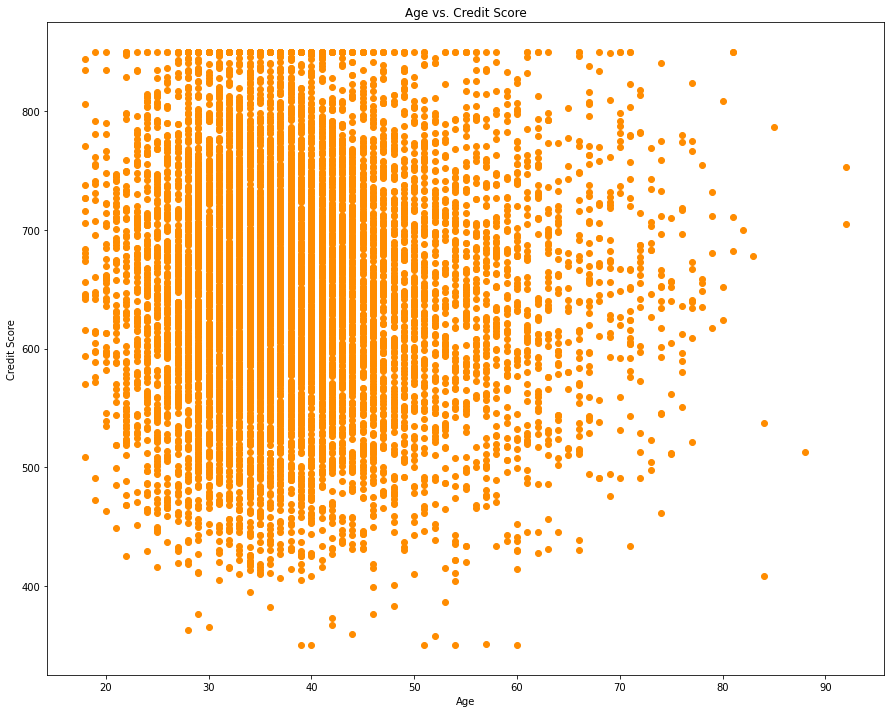

In [11]:
#visualizations

#Credit Scores by Age
plt.figure(figsize=(15, 12))
plt.scatter(df['Age'],df['CreditScore'],color='darkorange')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Age vs. Credit Score')
plt.show()

#### <span style="color:skyblue">Observations </span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
Users credit scores don't seem to be correlated with Age at first glance. They are all over the place for every age group.

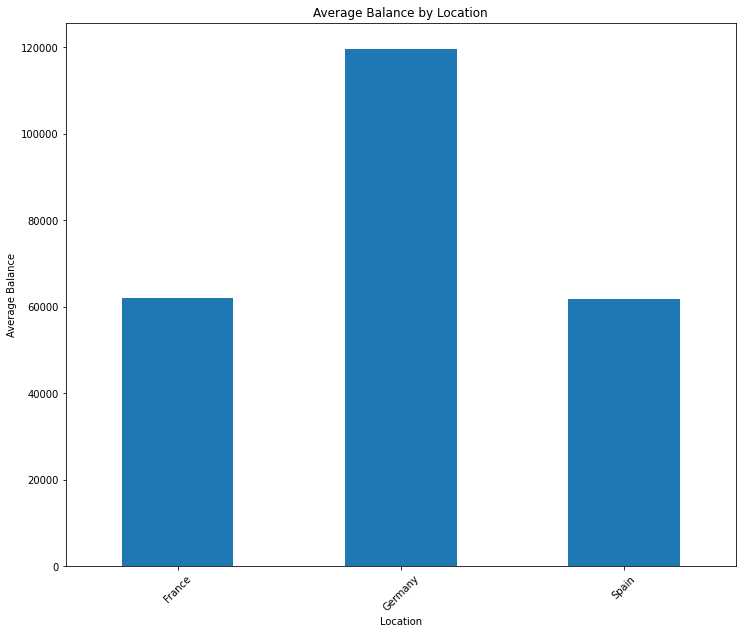

In [12]:
#Average Balance by Geography
avg_balance_by_location = df.groupby(['Geography'])['Balance'].mean()


avg_balance_by_location.plot(kind='bar',
                            figsize=(12, 10),
                            rot=45,
                            title='Average Balance by Location',
                            xlabel='Location',
                            ylabel='Average Balance')


plt.show()

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
Germans appear to be bringing in the most money for the bank! We'll want to make sure they stay.

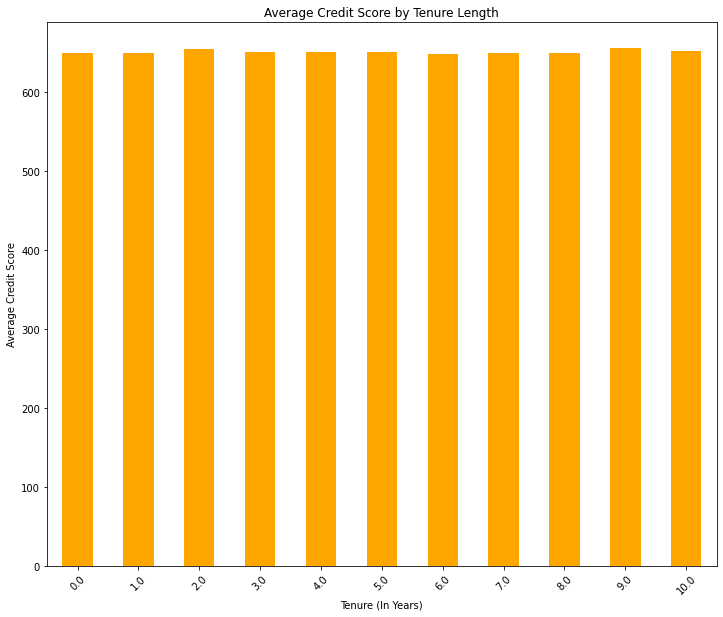

In [13]:
#Average Credit Score By Tenure
avg_credit_by_tenure = df.groupby(['Tenure'])['CreditScore'].mean()

avg_credit_by_tenure.plot(kind='bar',
                            figsize=(12, 10),
                            rot=45,
                            color='orange',
                            title='Average Credit Score by Tenure Length',
                            xlabel='Tenure (In Years)',
                            ylabel='Average Credit Score')


plt.show()

#### <span style="color:skyblue">Observations </span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
The average credit scores are very even accross the board. Staying with the bank longer doesn't seem to improve average credit score and new users don't tend to have weaker credit scores.

#### <span style="color:skyblue">Final Observations of the Data</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
This dataset has been cleaned and has no missing values, duplicates, and no longer contains missing values.
    
I plotted some graphs to get a better understanding of the data we are working with.
    
The data is ready for feature preparation.

### Feature Preparation

#### <span style="color:skyblue">Plan</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
I will test out Logistic Regression and Random Forest models to see which one is best

##### One Hot Encoding for Logistic Regression

In [14]:
data_ohe = pd.get_dummies(df, drop_first=True)

In [15]:
data_ohe.sample(5)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
4997,4998,15613886,722,43,1.0,0.00,1,1,0,44560.17,...,0,0,0,0,0,0,0,0,1,1
8749,8750,15701238,683,47,1.0,0.00,2,1,0,148989.15,...,0,0,0,0,0,0,0,0,0,1
4220,4221,15711314,589,45,1.0,0.00,1,0,0,125939.22,...,0,0,0,0,0,0,0,0,1,0
4116,4117,15748068,571,31,3.0,0.00,2,1,1,194667.92,...,0,0,0,0,0,0,0,0,1,0
6364,6365,15663421,527,28,6.0,128396.33,2,1,0,79919.97,...,0,0,0,0,0,0,0,0,1,1


##### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
We can see above that using OHE produces a dataframe with 2945 columns. This is a lot of columns to work with, but I will attempt a Logistic Regression model anyways.

##### Ordinal Encoding for Random Forest Classifier

In [16]:
#Create an instance of the class
encoder = OrdinalEncoder()

#train and transform the data
df_ordinal = pd.DataFrame(encoder.fit_transform(df),columns=df.columns)

In [17]:
df_ordinal

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,2736.0,1115.0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,1.0,3258.0,1177.0,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,2.0,2104.0,2040.0,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,3.0,5435.0,289.0,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,4.0,6899.0,1822.0,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,1599.0,1999.0,380.0,0.0,1.0,21.0,5.0,0.0,1.0,1.0,0.0,4827.0,0.0
9996,9996.0,161.0,1336.0,125.0,0.0,1.0,17.0,10.0,124.0,0.0,1.0,1.0,5087.0,0.0
9997,9997.0,717.0,1570.0,318.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,1.0,2062.0,1.0
9998,9998.0,4656.0,2345.0,381.0,1.0,1.0,24.0,3.0,427.0,1.0,1.0,0.0,4639.0,1.0


##### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">

We are okay with the labels being assigned arbitrarily because our categorical features such as Gender, Surname and Geography are not features that need to be organized in any type of order. 

#### Split data into Training, Test, and Validation sets

In [18]:
# The Exited field will be our target since we are trying to predict whether a customer will leave or not.

features = df_ordinal.drop(['Exited'],axis=1)
target = df_ordinal['Exited']

In [19]:
# split features and target into train, test, and validation datasets. Using a 3-1-1 split for this.
features_train, features_test, target_train, target_test = train_test_split(features,target,
                                                                         test_size=0.25,
                                                                         random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(features_train,target_train,
                                                                           test_size=0.25,
                                                                           random_state=12345)

In [20]:
#check to make sure all looks good.
display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)
display(features_valid.shape)
display(target_valid.shape)

(5625, 13)

(5625,)

(2500, 13)

(2500,)

(1875, 13)

(1875,)

#### Scaling

In [21]:
#We don't want features like salary to have greater weight over features like age, so I will scale the features.
scaler = StandardScaler()

#specify numeric columns to be scaled. I'm not scaling the encoded features because it is not necessary
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [22]:
display(features_train.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9315,9315.0,3463.0,449.0,0.436235,0.0,1.0,0.303124,1.097991,1.124264,-0.904415,1.0,0.0,-1.124671
58,58.0,2286.0,2570.0,-1.461412,2.0,0.0,2.564865,-0.179205,-0.949549,-0.904415,1.0,0.0,-1.713372
4609,4609.0,9177.0,1753.0,-0.735536,2.0,1.0,-0.450790,-1.137101,-0.949549,0.807340,0.0,1.0,-0.346299
9958,9958.0,3651.0,2655.0,-1.191801,0.0,1.0,-0.168073,0.459393,-0.949549,-0.904415,1.0,1.0,-1.440441
16,16.0,6877.0,2307.0,0.011079,1.0,1.0,1.810951,-1.137101,1.081217,-0.904415,1.0,0.0,-1.651531


### Logistic Regression Model

In [23]:
#Train a Logistic Regression model
def best_logistic_regression(features_train,features_valid,target_train,target_valid,class_weight):
    best_model = None
    best_score = 0
    solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    c_list = [0.01,0.1,1,10,100]
    
    for c in c_list:
        for solver in solver_list:
            model = LogisticRegression(random_state=12345,solver=solver,penalty='l2',C=c,class_weight=class_weight)
            model.fit(features_train,target_train)   
            score_valid = model.score(features_valid,target_valid)  
                
            if score_valid > best_score:
                best_model = model
                best_score = score_valid
                    
    return best_model, best_score

In [24]:
best_logistic_regression_specs = best_logistic_regression(features_train,features_valid,target_train,target_valid,None)
display(best_logistic_regression_specs)

(LogisticRegression(C=1, random_state=12345, solver='newton-cg'),
 0.8090666666666667)

In [25]:
#split the model from it's accuracy value and display results
model_lr, valid_accuracy_lr = best_logistic_regression_specs

In [26]:
model_lr.fit(features_train,target_train)

LogisticRegression(C=1, random_state=12345, solver='newton-cg')

In [27]:
#create a Series with predictions of the validation set to use in a sanity check
predicted_valid_lr = pd.Series(model_lr.predict(features_valid))

0.0    0.9456
1.0    0.0544
dtype: float64


<AxesSubplot:>

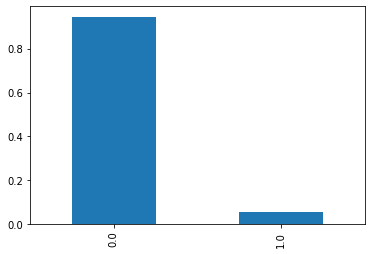

In [28]:
#count classes in the target feature
class_frequency_lr = predicted_valid_lr.value_counts(normalize=True)

print(class_frequency_lr)

class_frequency_lr.plot(kind='bar')

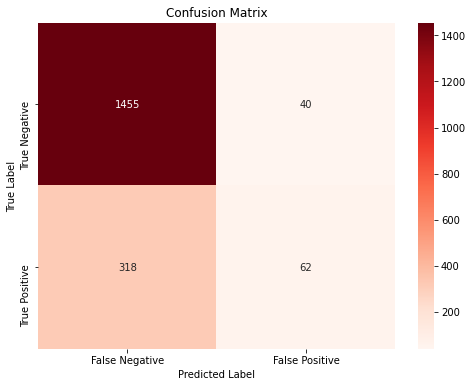

In [29]:
#plot a confusion matrix, check precision, recall and f1 scores
conf_mat = confusion_matrix(target_valid,predicted_valid_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['False Negative', 'False Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print('Recall:',recall_score(target_valid,predicted_valid_lr))
print('Precision:',precision_score(target_valid,predicted_valid_lr))
print('F1 Score:',f1_score(target_valid,predicted_valid_lr))

Recall: 0.1631578947368421
Precision: 0.6078431372549019
F1 Score: 0.2572614107883818


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
We can see with the initial Logistic Regression model that the more common class is predicted 94% of the time. This gets an F1 score of 0.25 which is not a good performance.
    
From the confusion matrix we see that there are a lot of False Negatives and not many True Positives. This model is very comfortable with picking the negative class

### Random Forest Classifier Model

In [31]:
#function to create a model with hyperparameters that will produce the best accuracy_score
def best_random_forest(features_train,features_valid,target_train,target_valid,class_weight):
    best_model = None
    best_result = 0
    
    for est in range(10,100):
        for depth in range(1,10):
                    model = RandomForestClassifier(random_state=12345,
                                                   n_estimators=est,
                                                   max_depth=depth,
                                                  class_weight=class_weight)
                    model.fit(features_train,target_train) # train the model
                    predictions = model.predict(features_valid)
                    result = accuracy_score(target_valid,predictions) # grab the accuracy score for each model to be compared
                
                    if result > best_result:
                        best_model = model
                        best_result = result
                        
    return best_model, best_result

In [32]:
#assign the model to a variable
best_random_forest_specs = best_random_forest(features_train,features_valid,target_train,target_valid,None)

In [33]:
#split the model from it's accuracy value and display results
model_rf, valid_accuracy = best_random_forest_specs
display(model_rf)
display(valid_accuracy)

RandomForestClassifier(max_depth=9, n_estimators=66, random_state=12345)

0.8597333333333333

### Train the Model

In [34]:
#train the model we got using the function with our training features and target
model_rf.fit(features_train,target_train)

RandomForestClassifier(max_depth=9, n_estimators=66, random_state=12345)

### Sanity Check

In [35]:
#create a Series with predictions of the validation set to use in a sanity check
predicted_valid_rf = pd.Series(model_rf.predict(features_valid))

0.0    0.897067
1.0    0.102933
dtype: float64


<AxesSubplot:>

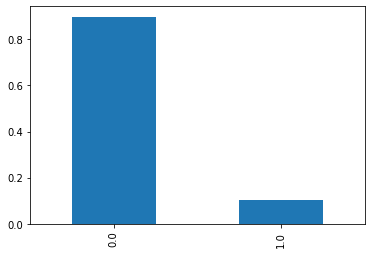

In [36]:
#count classes in the target feature
class_frequency = predicted_valid_rf.value_counts(normalize=True)

print(class_frequency)

class_frequency.plot(kind='bar')

In [37]:
#compare the above to a constant model
target_pred_constant = pd.Series([0] * len(predicted_valid_rf))

In [38]:
display(accuracy_score(target_valid,target_pred_constant))

0.7973333333333333

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
 
Achieving 89% accuracy with the model seems like an improvement over the constant model which achieves the result 79% of the time, but it is clear there is class imbalance. The model's high accuracy could be misleading since it's primarily driven by its ability to predict the more common class, rather than capturing meaningful patterns from the data.

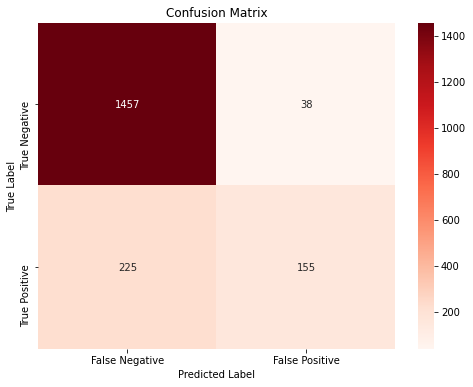

In [39]:
#plot a confusion matrix, check precision, recall and f1 scores
conf_mat = confusion_matrix(target_valid,predicted_valid_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['False Negative', 'False Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print('Recall:',recall_score(target_valid,predicted_valid_rf))
print('Precision:',precision_score(target_valid,predicted_valid_rf))
print('F1 Score:',f1_score(target_valid,predicted_valid_rf))

Recall: 0.40789473684210525
Precision: 0.8031088082901554
F1 Score: 0.5410122164048865


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
 
**Confusion Matrix**: The model has a great amount of True Positives and Negatives, but has a large amount of False Negatives.

**Recall**: We can see from the confusion matrix as well why this score is low, we have a large amount of False Negatives
    
**Precision**: From our precision score, we can see that the model has a low false positive rate.

**F1**: The model's performance is moderate in terms of precision and recall. 
    
**Overall**: The model is conservative in predicting the positive class and can be improved. My goal is to improve the F1 score to be a 0.59 at least

### Improve the Quality of the Model

#### <span style="color:skyblue">Plan</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
I will try a few different ways of improving the quality of the model.
    
    - I will balance the class weight
    - I will start with Upsampling
    - Then, I will try Downsampling

#### Balance the Class Weight

In [41]:
#find best hyperparameters for both balanced models
best_logistic_regression_balanced = best_logistic_regression(features_train,features_valid,target_train,target_valid,'balanced')
best_random_forest_balanced = best_random_forest(features_train,features_valid,target_train,target_valid,'balanced')

In [42]:
#assign models to variables
model_lr_balanced,valid_accuracy_lr_balanced = best_logistic_regression_balanced
model_rf_balanced,valid_accuracy_rf_balanced = best_random_forest_balanced

In [43]:
#display hyperparameters and accuracies.
display(model_lr_balanced,valid_accuracy_lr_balanced)
display(model_rf_balanced,valid_accuracy_rf_balanced)

LogisticRegression(C=0.01, class_weight='balanced', random_state=12345,
                   solver='liblinear')

0.7184

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=50,
                       random_state=12345)

0.8378666666666666

In [44]:
#train new models
model_lr_balanced.fit(features_train,target_train)
model_rf_balanced.fit(features_train,target_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=50,
                       random_state=12345)

In [45]:
#get predictions for new models
predictions_lr_balanced = model_lr_balanced.predict(features_valid)
predictions_rf_balanced = model_rf_balanced.predict(features_valid)

In [46]:
#get new F1 scores
print('Logistic Regression Balanced Recall:',recall_score(target_valid,predictions_lr_balanced))
print('Logistic Regression Balanced Precision:',precision_score(target_valid,predictions_lr_balanced))
print('Logistic Regression Balanced F1 Score:',f1_score(target_valid,predictions_lr_balanced))

print('Random Forest Balanced Recall:',recall_score(target_valid,predictions_rf_balanced))
print('Random Forest Balanced Precision:',precision_score(target_valid,predictions_rf_balanced))
print('Random Forest Balanced F1 Score:',f1_score(target_valid,predictions_rf_balanced))

Logistic Regression Balanced Recall: 0.6894736842105263
Logistic Regression Balanced Precision: 0.3898809523809524
Logistic Regression Balanced F1 Score: 0.49809885931558934
Random Forest Balanced Recall: 0.6394736842105263
Random Forest Balanced Precision: 0.5926829268292683
Random Forest Balanced F1 Score: 0.6151898734177216


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
 
We can see from these new F1 scores after balancing the weight classes that the Logistic Regression model improved by .24, a huge improvement, but not quite what we want. The Random Forest model improved by .07, also a big improvement, and gets us the score we want. Balancing the weight classes gave us a much better model for both model types, but I will continue trying to improve both.

#### Upsampling

In [47]:
#create upsample function
def upsample(features,target,repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled,target_upsampled = shuffle(features_upsampled,target_upsampled,random_state=12345)
    
    return features_upsampled,target_upsampled

In [48]:
#use function to upsample the training sets
features_upsampled,target_upsampled = upsample(features_train,target_train,5)

#create new empty models
upsample_model_lr = model_lr_balanced
upsample_model_rf = model_rf_balanced

#### Logistric Regression with Upsampling

In [49]:
#train the new model,get predictions and get probabilities for ROC curve
upsample_model_lr.fit(features_upsampled,target_upsampled)
upsample_predictions_lr = upsample_model_lr.predict(features_valid)
probabilities_valid_up_lr = upsample_model_lr.predict_proba(features_valid)[:, 1]

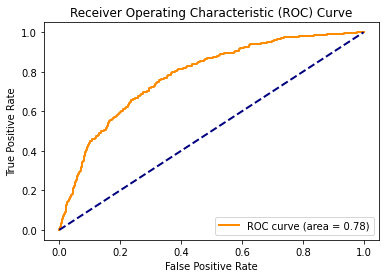

In [50]:
#calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid_up_lr)

#calculate auc
roc_auc = roc_auc_score(target_valid,probabilities_valid_up_lr)

#plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
#check F1 score of new model.
print('F1 Score:',f1_score(target_valid,upsample_predictions_lr))

F1 Score: 0.49858889934148626


#### Random Forest with Upsampling

In [52]:
#train the new model,get predictions and get probabilities for ROC curve
upsample_model_rf.fit(features_upsampled,target_upsampled)
upsample_predictions_rf = upsample_model_rf.predict(features_valid)
probabilities_valid_up_rf = upsample_model_rf.predict_proba(features_valid)[:, 1]

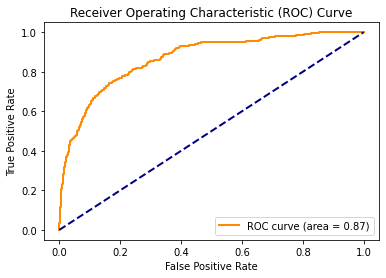

In [53]:
#calculate ROC curve metrics
fpr_rf, tpr_rf, thresholds = roc_curve(target_valid, probabilities_valid_up_rf)

#calculate auc
roc_auc_rf = roc_auc_score(target_valid,probabilities_valid_up_rf)

#plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [54]:
#check F1 score of new model.
print('F1 Score:',f1_score(target_valid,upsample_predictions_rf))

F1 Score: 0.6207674943566592


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
From training Random Forest and Logistic Regression models with upsampling, I was able to get my Random Forest F1 score up 1% while keeping the Logitic Regression model the same. 
    
    The ROC-AUC of 0.87 for the Random Forest model with upsampled data is impressive and shows the model performs very well. This model is the front runner thus far to be the final model I use for testing.

#### Downsampling

In [55]:
#create downsample function
def downsample(features,target,fraction):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction,random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction,random_state=12345)] + [target_ones])
    
    features_downsampled,target_downsampled = shuffle(features_downsampled,target_downsampled,random_state=12345)
    
    return features_downsampled,target_downsampled

In [56]:
#use downsample function on training sets with a fraction of 0.1
features_downsampled_1,target_downsampled_1 = downsample(features_train,target_train,0.1)

#create and train new models
downsample_model_lr = model_lr_balanced
downsample_model_rf = model_rf_balanced

#### Logistric Regression with Downsampling

In [57]:
downsample_model_lr.fit(features_downsampled_1,target_downsampled_1)
predictions_down = downsample_model_lr.predict(features_valid)

In [58]:
#get new F1 score
print('F1 Score after downsampling by 0.1:',f1_score(target_valid,predictions_down))

F1 Score after downsampling by 0.1: 0.5032863849765258


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
    This is an improved score over the previous Logistic Regression models, but still no where close to the performance we are looking for

In [59]:
#start the process over with the same function, but with a fraction of 0.5
features_downsampled_5,target_downsampled_5 = downsample(features_train,target_train,0.5)

In [60]:
#create and train new model
downsample_model_lr = model_lr_balanced
downsample_model_lr.fit(features_downsampled_5,target_downsampled_5)
predictions_down = downsample_model_lr.predict(features_valid)

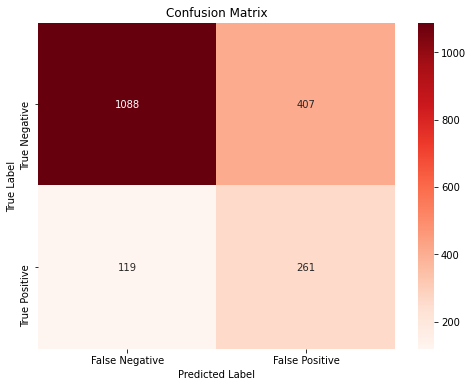

In [61]:
#plot a confusion matrix, check precision, recall and f1 scores
conf_mat_down = confusion_matrix(target_valid,predictions_down)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_down, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['False Negative', 'False Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [62]:
#get new F1 score
print('F1 Score after downsampling by 0.5:',f1_score(target_valid,predictions_down))

F1 Score after downsampling by 0.5: 0.49809160305343503


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
    This is a similar score to previous models and shows that Downsampling doesn't help the Logistic Regression model either.

#### Random Forest with Downsampling

In [63]:
#Test both downsampled sets on our Random Forest model
#create and train new model
downsample_model_rf = model_rf_balanced
downsample_model_rf.fit(features_downsampled_1,target_downsampled_1)
predictions_down_rf = downsample_model_rf.predict(features_valid)

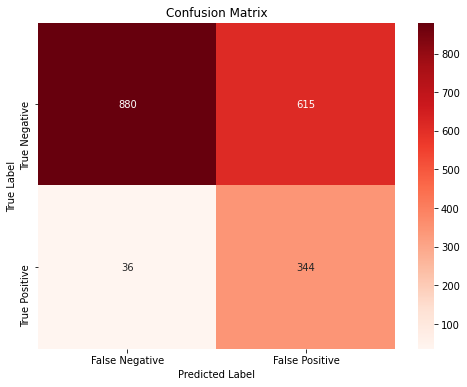

In [64]:
#plot a confusion matrix, check precision, recall and f1 scores
conf_mat_down_rf = confusion_matrix(target_valid,predictions_down_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_down_rf, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['False Negative', 'False Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [65]:
#get new F1 score
print('F1 Score after downsampling by 0.5:',f1_score(target_valid,predictions_down_rf))

F1 Score after downsampling by 0.5: 0.513816280806572


In [66]:
#Now try with 0.5 downsampling

#create and train new model
downsample_model_rf = model_rf_balanced
downsample_model_rf.fit(features_downsampled_5,target_downsampled_5)
predictions_down_rf = downsample_model_rf.predict(features_valid)

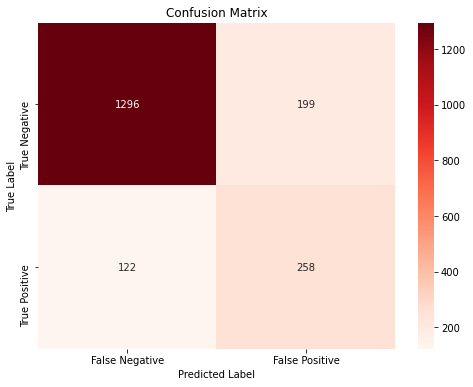

In [67]:
#plot a confusion matrix, check precision, recall and f1 scores
conf_mat_down_rf = confusion_matrix(target_valid,predictions_down_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_down_rf, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['False Negative', 'False Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
#get new F1 score
print('F1 Score after downsampling by 0.5:',f1_score(target_valid,predictions_down_rf))

F1 Score after downsampling by 0.5: 0.6164874551971327


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
    The fraction of 0.1 tanked the performance of the Random Forest model and introduced way too many False Positives. The fraction of 0.5 kept the score around the same as our initial model, so this was not needed.
    
    Overall, the Upsampled Random Forest Classifier after class balancing performed the best at a score of 0.62 and will be used for final testing with the testing + validation sets.

### Final Testing

In [69]:
#I will use my upsampled training sets to train my final model: a balanced class weight random forest classifier
#combine test and validation datasets
features_test_valid = pd.concat([features_test,features_valid])
target_test_valid = pd.concat([target_test,target_valid])

#create new model
best_model = model_rf_balanced

#train model and get predictions
best_model.fit(features_upsampled,target_upsampled)
predictions_test_valid = pd.Series(best_model.predict(features_test_valid))

0.0    0.730286
1.0    0.269714
dtype: float64


<AxesSubplot:>

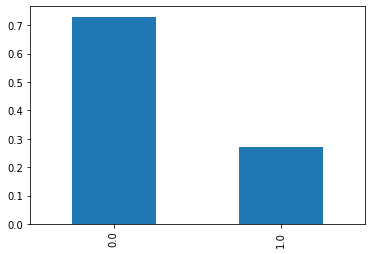

In [70]:
#count classes in the target feature
class_frequency = predictions_test_valid.value_counts(normalize=True)

print(class_frequency)

class_frequency.plot(kind='bar')

We see here that the model has been trained to predict the common class way less than before.

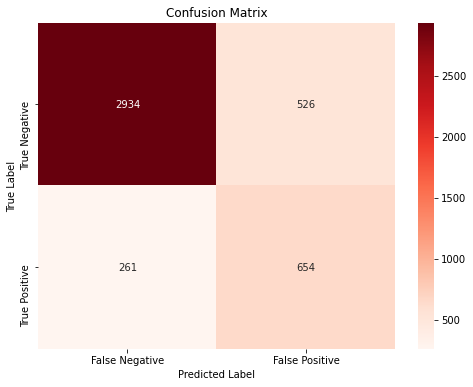

In [71]:
#plot a confusion matrix, check precision, recall and f1 scores
conf_mat_best = confusion_matrix(target_test_valid,predictions_test_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_best, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['False Negative', 'False Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [72]:
print('Recall:',recall_score(target_test_valid,predictions_test_valid))
print('Precision:',precision_score(target_test_valid,predictions_test_valid))
print('F1 Score:',f1_score(target_test_valid,predictions_test_valid))

Recall: 0.7147540983606557
Precision: 0.5542372881355933
F1 Score: 0.6243436754176611


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
 
**Confusion Matrix**: Compared to the initial confusion matric, there's less false negatives, but a bit more false positives. The amount of True Positive's outweigh the False Negatives now, though.

**Recall**: This is a huge improvement over the initial model. Our larger recall score indicates that the model is better at identifying positive instances correctly.
    
**Precision**: As we can see in our confusion matrix, our model is now more prone to False Positives. In our case, it is okay to have more False Positives, we care more about correctly predicting customers leaving.

**F1**: Overall, Our model's F1 score increased by 0.08 over the initial. The model is able to predict both positive and negative much more accurately. It has a much better perforamnce over the initial model.

## Conclusion

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
To summarize:
    
    1. I found the most accurate model using a function to pick the best hyperparamters for Random Forest Classifier and Logistic Regression models from a range.
    
    2. I ignored class imbalance and trained these models and checked the metrics of their performances. I had an F1 score of 0.54 for the Random Forest and .24 for the Logistic Regression.
    
    3. I balanced the weight classes as my first step to improve the models, I doubled the score of the Logistic Regression model and increased the performance of the Random Forest model considerably.
    
    3. The Logistic Regression model needed a lot of work, but the Random Forest model had already passed our threshold of 0.59, I took steps to improve both of them.
    
    4. I reached a 0.5 F1 score with the Logistic Regression model after trying balancing, upsampling, and downsampling. I went with the Random Forest model for which I had achieved a 0.62 score after balancing and upsampling.
    
    5. I picked the Random Forest model and performed a final test using the test + validation datasets and accomplished a 0.62 F1 score. 
    
    6. I interpreted my results in my observations
    
    
I displayed how upsampling and downsampling can be used to improve a model's performance. An F1 score of 0.62 suggests that the model achieved a reasonable balance between correctly identifying positive instances and minimizing false positives. I did this with a small dataset. Small datasets may limit the model's ability to capture complex patterns and generalize to unseen data, potentially affecting the reliability of the results.
    
***The Task***
    
I made an effort to accurately predict whether a customer would stay or leave the bank. False negatives would have been dangerous here and False positives would have been less impactful. I was able to minimize our False negatives while greatly increasing True Positives and Negatives and increasing False Positives. This should be able to help the bank gauge which customers may be on their way out.